**DATA COLLECTION**

In [ ]:
!pip install -qq google-play-scraper

In [ ]:
!pip install -qq -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00


In [ ]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

pandas             : 1.5.3
matplotlib         : 3.7.1
seaborn            : 0.12.2
google_play_scraper: 1.2.4



In [ ]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette = 'muted', font_scale=1.2)

In [ ]:
app_packages = [
  'in.startv.hotstar',
  'com.digilocker.android',
  'com.openai.chatgpt',
  'nic.goi.aarogyasetu',
  'in.gov.uidai.mAadhaarPlus',
  'com.snapchat.android',
  'com.instagram.android',
  'com.flipkart.android',
  'com.meesho.supply',
  'com.whatsapp',
  'com.truecaller',
  'com.facebook.katana',
  'org.telegram.messenger',
  'net.one97.paytm',
  'com.myntra.android',
  'com.canva.editor'
]

In [ ]:
len(app_packages)

16

In [ ]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='in')
  del info['comments']
  app_infos.append(info)

100%|██████████| 16/16 [00:03<00:00,  4.36it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": true,
  "appId": "in.startv.hotstar",
  "categories": [
    {
      "id": "ENTERTAINMENT",
      "name": "Entertainment"
    }
  ],
  "containsAds": true,
  "contentRating": "Rated for 12+",
  "contentRatingDescription": "Parental Guidance Recommended",
  "currency": "INR",
  "description": "Disney+ Hotstar is your go-to video streaming app for the best of live sports, TV shows, and movies.\r\n\r\nEnjoy unlimited access to 100,000 hours of TV shows and movies from India and across the world, Star India TV shows, major sporting events, and exclusive Hotstar Specials produced by us.\r\nWhat\u2019s more? Now watch the biggest cricketing tournaments of the year, Asia Cup 2023 and ICC Men\u2019s Cricket World Cup 2023, for free on your mobile. Only on Disney+ Hotstar. \r\n\r\nFor users in India, we also bring you the world\u2019s best stories from Disney, Pixar, Star Wars, and Marvel studios (Disney+). We\u2019ve also dubbed them in Indian languages like Hindi, Tamil, Tel

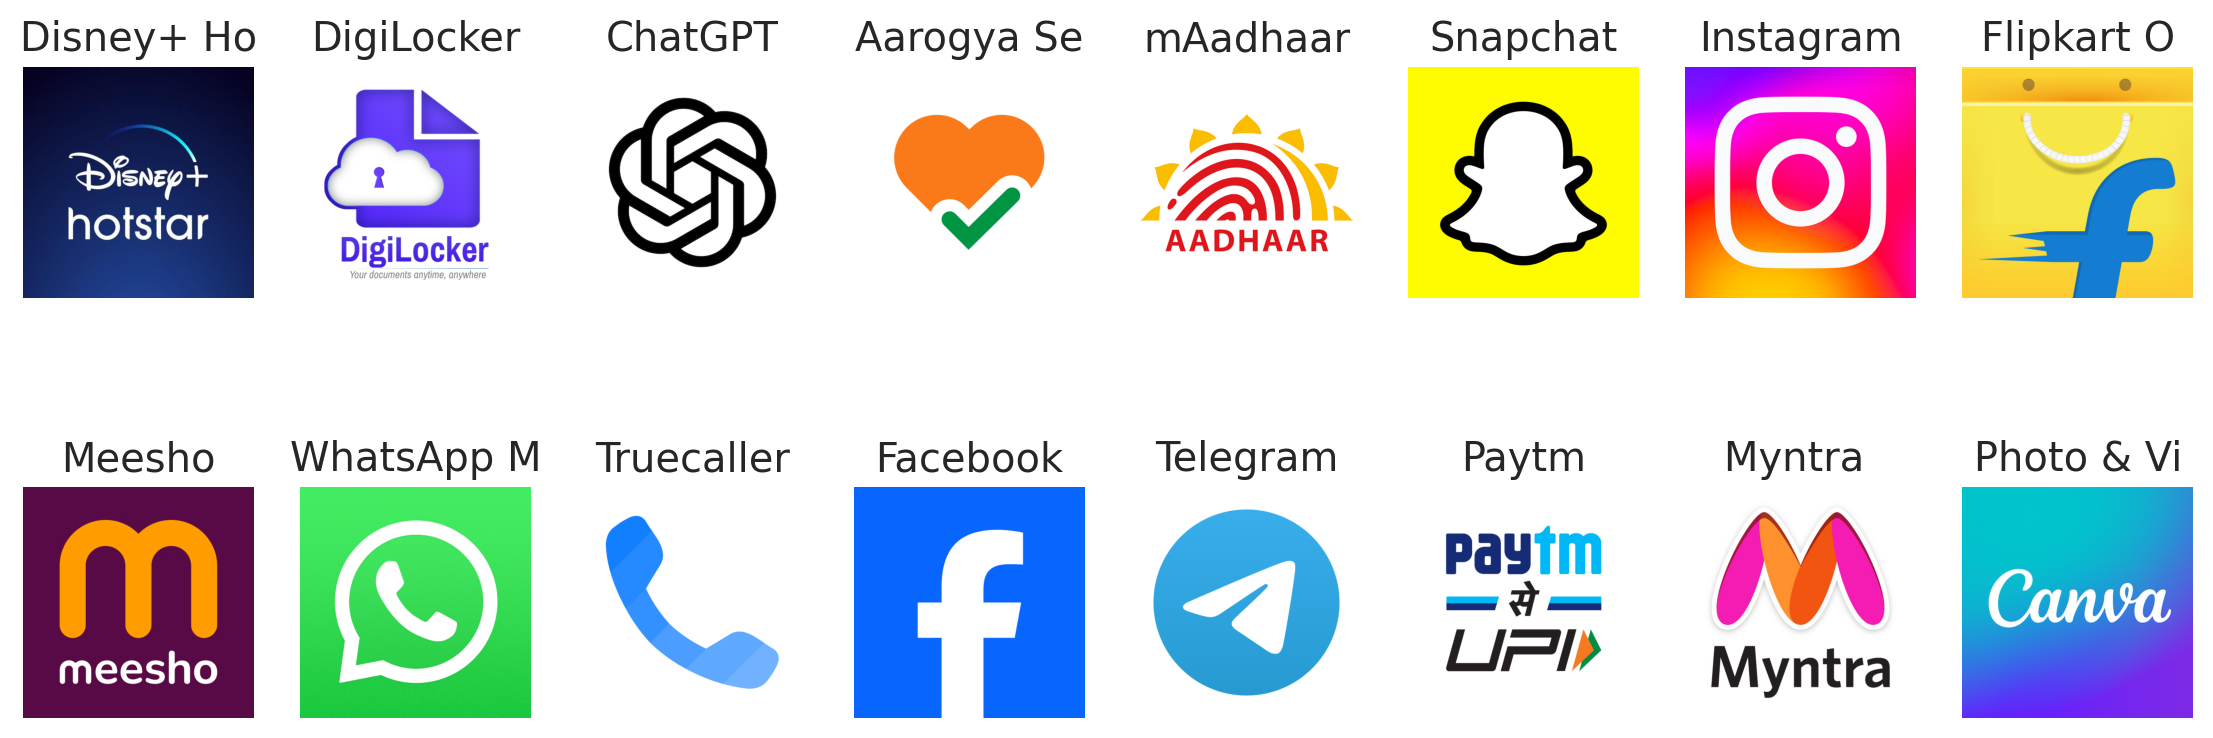

In [ ]:
from PIL import Image
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
    return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]

    # Open the image using Pillow
    img = np.array(Image.open(urllib.request.urlopen(ai['icon'])))

    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

plt.show()

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(2)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,appId,url
0,Disney+ Hotstar,Disney+ Hotstar is your go-to video streaming ...,Disney+ Hotstar is your go-to video streaming ...,"Watch the latest Live Sports, TV and Movies in...","500,000,000+",500000000,748990345,3.957152,11561292,3099246,...,None,Rated for 12+,Parental Guidance Recommended,True,True,"Jan 7, 2015",1699015744,None,in.startv.hotstar,https://play.google.com/store/apps/details?id=...
1,DigiLocker,DigiLocker is a key initiative under Digital I...,DigiLocker is a key initiative under Digital I...,DigiLocker - a simple and secure document wa...,"50,000,000+",50000000,80400119,4.159067,438545,130697,...,None,Rated for 3+,None,False,False,"Dec 23, 2015",1698405755,7.4.5,com.digilocker.android,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [ ]:
from google_play_scraper.features.reviews import reviews, Sort

app_reviews = []

for ap in tqdm(app_packages):
    try:
        for score in range(1, 6):
            for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
                reviews_data, app_info = reviews(
                    ap,
                    lang="en",
                    country="in",
                    sort=sort_order,
                    count=200 if score == 3 else 100,
                    filter_score_with=score
                )

                for r in reviews_data:
                    r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                    r['appId'] = ap
                app_reviews.extend(reviews_data)
    except Exception as e:
        print(f"Error for app {ap}: {e}")
        continue


100%|██████████| 16/16 [01:04<00:00,  4.01s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "in.startv.hotstar",
  "appVersion": "23.09.29.5",
  "at": "2023-11-05 09:32:06",
  "content": "Hotstar app is okay, but the website is extremely poor. They don't have an app for Windows, so I have no choice but to stream on the website. But the streaming is extremely bad. There is no proper buffering and the video stops repeatedly, and the quality of the video also keeps dropping again and again. Very bad experience when compared to streaming on Netflix and Amazon Prime. There doesn't seem to be any other place to post a review for the website so I am having to post here.",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "23.09.29.5",
  "reviewId": "c11d0b46-b47f-4f63-8416-1e50b051d823",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 56,
  "userImage": "https://play-lh.googleusercontent.com/a/ACg8ocK9pCR-ZACtcvFXgm1ZW5AM9MjWjDr6D7Q_jAO9WUUPOk0=mo",
  "userName": "Abhiram Polali"
}



In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(19200, 13)

In [ ]:
app_reviews_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,c11d0b46-b47f-4f63-8416-1e50b051d823,Abhiram Polali,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hotstar app is okay, but the website is extrem...",1,56,23.09.29.5,2023-11-05 09:32:06,None,NaT,23.09.29.5,most_relevant,in.startv.hotstar
1,4f3cb55a-1cbe-42ca-a294-3d9bb09223db,YERRISWAMY REDDY,https://play-lh.googleusercontent.com/a-/ALV-U...,"Worst app ever. With a paid subscription, I'm ...",1,59,23.09.29.5,2023-10-30 15:47:04,None,NaT,23.09.29.5,most_relevant,in.startv.hotstar


In [ ]:
app_reviews_df.to_csv('reviews.csv', index=None)